### import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

from main.data_tools.extract_Nevents import get_Nevents

Welcome to JupyROOT 6.26/04


In [27]:
file_name = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/MC15ri_charged/240518_from_B_v0_etapi0const/*.root'
base_filter = 'Dp_isSignal==1 && Dp_M>0 && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && Dp_CMS_p<2.5'
base_filter = 'Dp_M>1.6 && Dp_M<2.1'

signal_variables = ["Dp_M","Dp_CMS_p","Dp_isSignal","Dp_genMotherPDG"]
tree = 'etapip_gg'

In [28]:
pd_df_etapip_gg_charged = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

In [58]:
file_name = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/MC15ri_mixed/240518_from_B_v0_etapi0const/*.root'


In [59]:
pd_df_etapip_gg_mixed = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

In [31]:
file_name = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240521_from_B_v0/*.root'
# signal_variables = ["Dp_M"]


In [32]:
pd_df_etapip_gg = get_pd(file=file_name, tree=tree,base_filter=base_filter,variables=signal_variables)

1967045


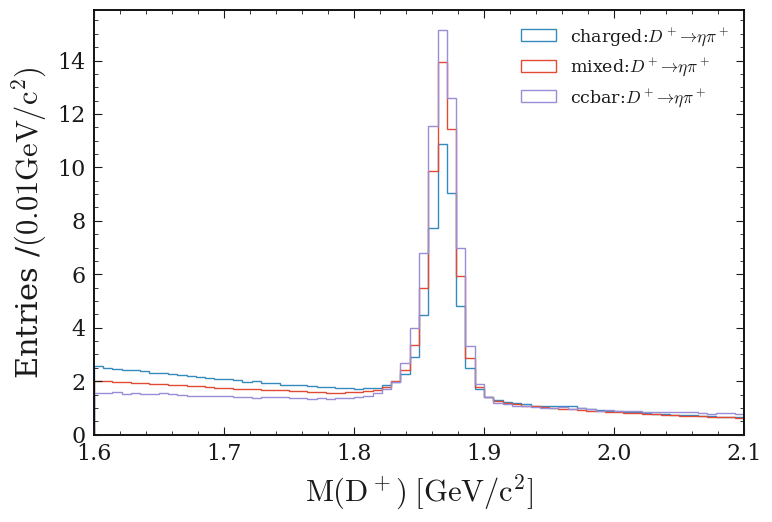

In [33]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,71)

xm = np.linspace(*xrange)

df = pd_df_etapip_gg_charged
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(pd_df_etapip_gg_charged["Dp_M"],bins=xm,histtype='step',label=r'charged:$D^+ \to \eta \pi^+$',density=True);
plt.hist(pd_df_etapip_gg_mixed["Dp_M"],bins=xm,histtype='step',label=r'mixed:$D^+ \to \eta \pi^+$',density=True);

plt.hist(pd_df_etapip_gg["Dp_M"],bins=xm,histtype='step',label=r'ccbar:$D^+ \to \eta \pi^+$',density=True);

plt.legend(loc="upper right",fontsize=12.5)
# ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

1967045


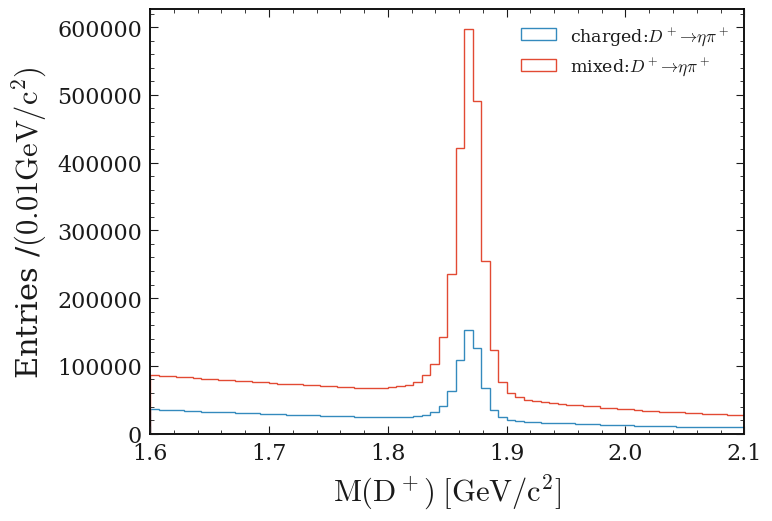

In [34]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,71)

xm = np.linspace(*xrange)

df = pd_df_etapip_gg_charged
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(pd_df_etapip_gg_charged["Dp_M"],bins=xm,histtype='step',label=r'charged:$D^+ \to \eta \pi^+$');
plt.hist(pd_df_etapip_gg_mixed["Dp_M"],bins=xm,histtype='step',label=r'mixed:$D^+ \to \eta \pi^+$');

# plt.hist(pd_df_etapip_gg["Dp_M"],bins=xm,histtype='step',label=r'ccbar:$D^+ \to \eta \pi^+$');

plt.legend(loc="upper right",fontsize=12.5)
# ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))

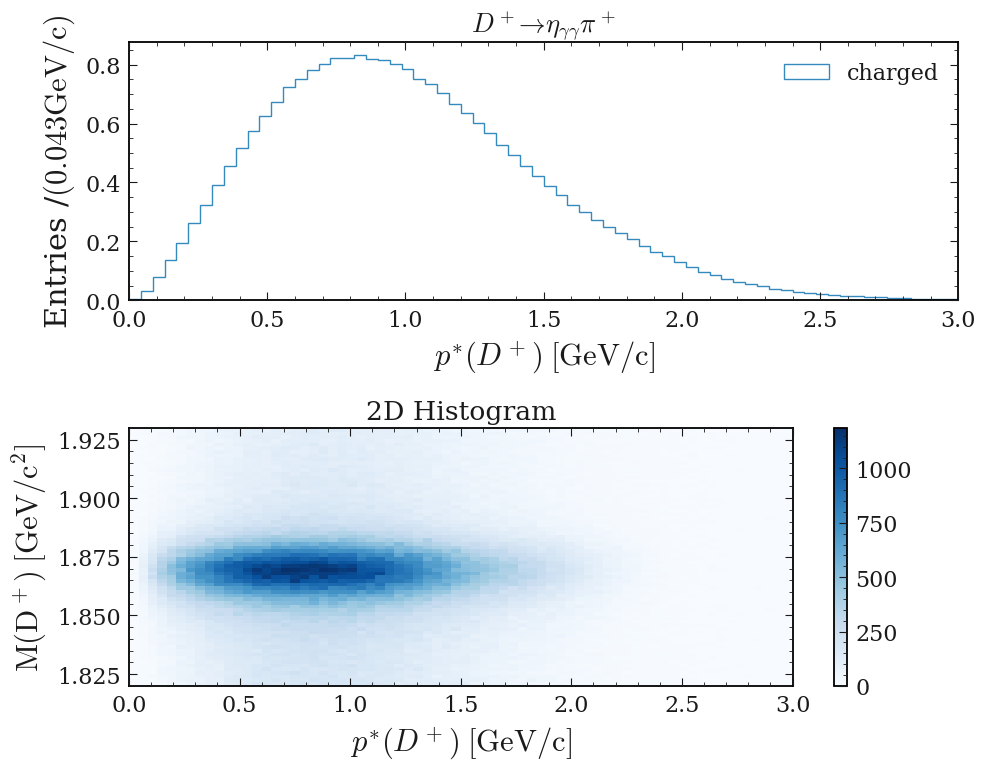

1967045


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframes are already defined
# df = pd_df_test
# df2 = pd_df_test2

var1 = "Dp_CMS_p"
var2 = "Dp_M"

xrange = (0, 3, 71) 
yrange = (1.82, 1.93, 71) 

xm = np.linspace(xrange[0], xrange[1], xrange[2])
ym = np.linspace(yrange[0], yrange[1], yrange[2])

fig = plt.figure(figsize=(10, 8))

df = pd_df_etapip_gg_charged

# 1D Histograms
ax1 = fig.add_subplot(211)
ax1.hist(pd_df_etapip_gg_charged[var1], bins=xm, histtype='step', label='charged', density=True)
# ax1.hist(pd_df_etapip_gg_mixed[var1], bins=xm, histtype='step', label='mixed', density=True)
ax1.legend(loc="upper right")
ax1.set_title(r'$D^+ \to \eta_{\gamma\gamma} \pi^+$')
ax1.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xm[1] - xm[0]
ax1.set_ylabel('Entries' + ' /' + '$(' + ' ' + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c})$')
ax1.set_xlim(xrange[0], xrange[1])

# 2D Histogram
ax2 = fig.add_subplot(212)
h = ax2.hist2d(df[var1], df[var2], bins=[xm, ym], cmap='Blues')
plt.colorbar(h[3], ax=ax2)
ax2.set_title(r'2D Histogram')
ax2.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
ax2.set_ylabel(r"$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
ax2.set_xlim(xrange[0], xrange[1])
ax2.set_ylim(yrange[0], yrange[1])

plt.tight_layout()
plt.show()

# Uncomment below line to save the figure
# file1_name = "/path/to/save/figure.png"
# plt.savefig(file1_name)

print(len(df))



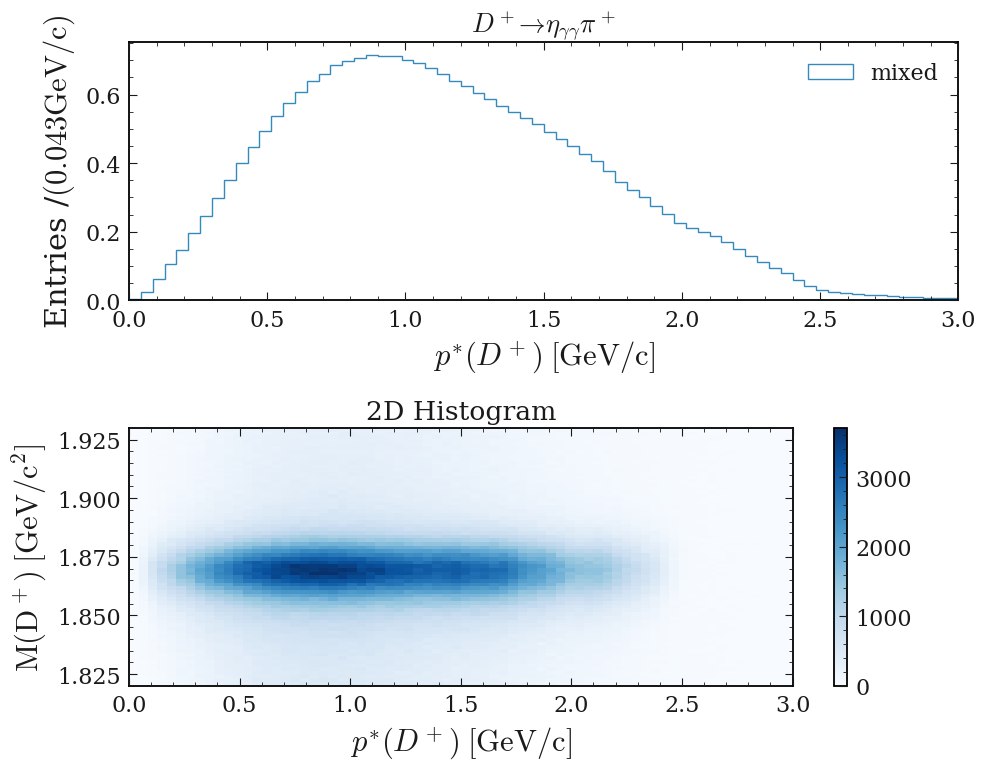

5997266


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframes are already defined
# df = pd_df_test
# df2 = pd_df_test2

var1 = "Dp_CMS_p"
var2 = "Dp_M"

xrange = (0, 3, 71) 
yrange = (1.82, 1.93, 71) 

xm = np.linspace(xrange[0], xrange[1], xrange[2])
ym = np.linspace(yrange[0], yrange[1], yrange[2])

fig = plt.figure(figsize=(10, 8))

df = pd_df_etapip_gg_mixed

# 1D Histograms
ax1 = fig.add_subplot(211)
# ax1.hist(pd_df_etapip_gg_charged[var1], bins=xm, histtype='step', label='charged', density=True)
ax1.hist(pd_df_etapip_gg_mixed[var1], bins=xm, histtype='step', label='mixed', density=True)
ax1.legend(loc="upper right")
ax1.set_title(r'$D^+ \to \eta_{\gamma\gamma} \pi^+$')
ax1.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xm[1] - xm[0]
ax1.set_ylabel('Entries' + ' /' + '$(' + ' ' + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c})$')
ax1.set_xlim(xrange[0], xrange[1])

# 2D Histogram
ax2 = fig.add_subplot(212)
h = ax2.hist2d(df[var1], df[var2], bins=[xm, ym], cmap='Blues')
plt.colorbar(h[3], ax=ax2)
ax2.set_title(r'2D Histogram')
ax2.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
ax2.set_ylabel(r"$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
ax2.set_xlim(xrange[0], xrange[1])
ax2.set_ylim(yrange[0], yrange[1])

plt.tight_layout()
plt.show()

# Uncomment below line to save the figure
# file1_name = "/path/to/save/figure.png"
# plt.savefig(file1_name)

print(len(df))



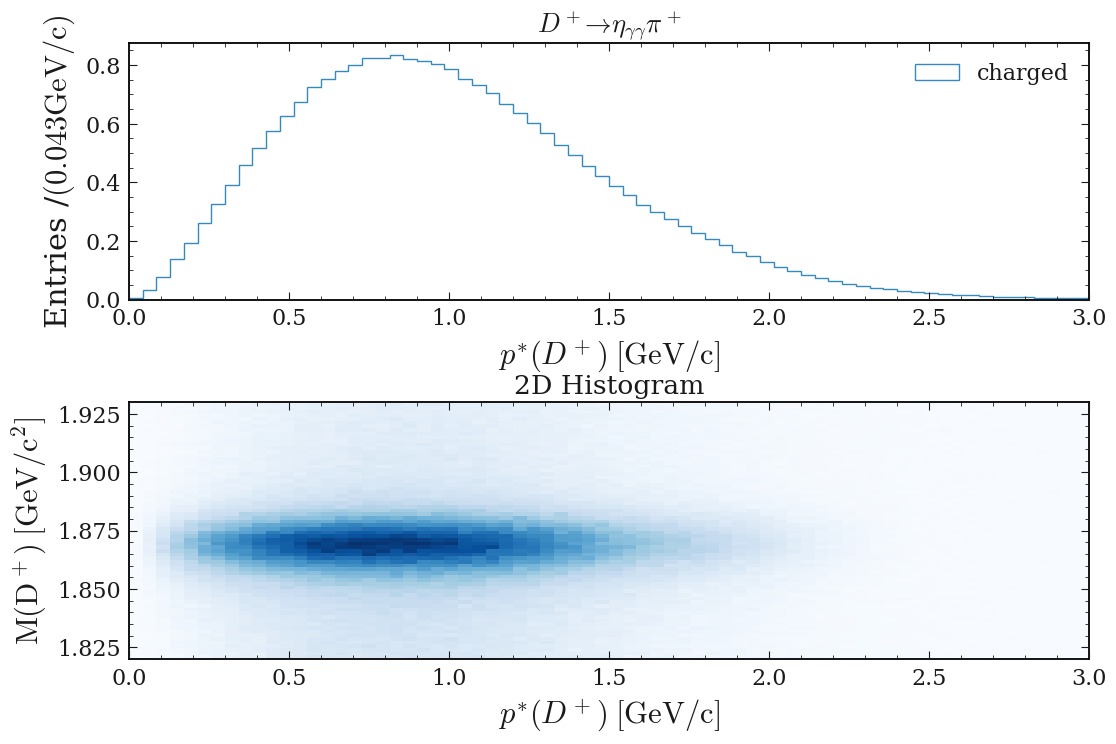

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming the dataframes are already defined
# df = pd_df_test
# df2 = pd_df_test2

var1 = "Dp_CMS_p"
var2 = "Dp_M"

xrange = (0, 3, 71) 
yrange = (1.82, 1.93, 71) 

xm = np.linspace(xrange[0], xrange[1], xrange[2])
ym = np.linspace(yrange[0], yrange[1], yrange[2])

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.4)

df = pd_df_etapip_gg_charged

# 1D Histogram
ax1 = fig.add_subplot(gs[0])
ax1.hist(pd_df_etapip_gg_charged[var1], bins=xm, histtype='step', label='charged', density=True)
# ax1.hist(pd_df_etapip_gg_mixed[var1], bins=xm, histtype='step', label='mixed', density=True)
ax1.legend(loc="upper right")
ax1.set_title(r'$D^+ \to \eta_{\gamma\gamma} \pi^+$')
ax1.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xm[1] - xm[0]
ax1.set_ylabel('Entries' + ' /' + '$(' + ' ' + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c})$')
ax1.set_xlim(xrange[0], xrange[1])

# 2D Histogram
ax2 = fig.add_subplot(gs[1])
h = ax2.hist2d(df[var1], df[var2], bins=[xm, ym], cmap='Blues')
# plt.colorbar(h[3], ax=ax2)
ax2.set_title(r'2D Histogram')
ax2.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
ax2.set_ylabel(r"$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
ax2.set_xlim(xrange[0], xrange[1])
ax2.set_ylim(yrange[0], yrange[1])

# Ensure both subplots have the same horizontal length
for ax in [ax1, ax2]:
    pos = ax.get_position()
    pos.x0 = 0.1  # Left margin
    pos.x1 = 0.9  # Right margin
    ax.set_position(pos)

# plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_charged_signalmc_v0.png"
plt.savefig(file1_name)
plt.show()

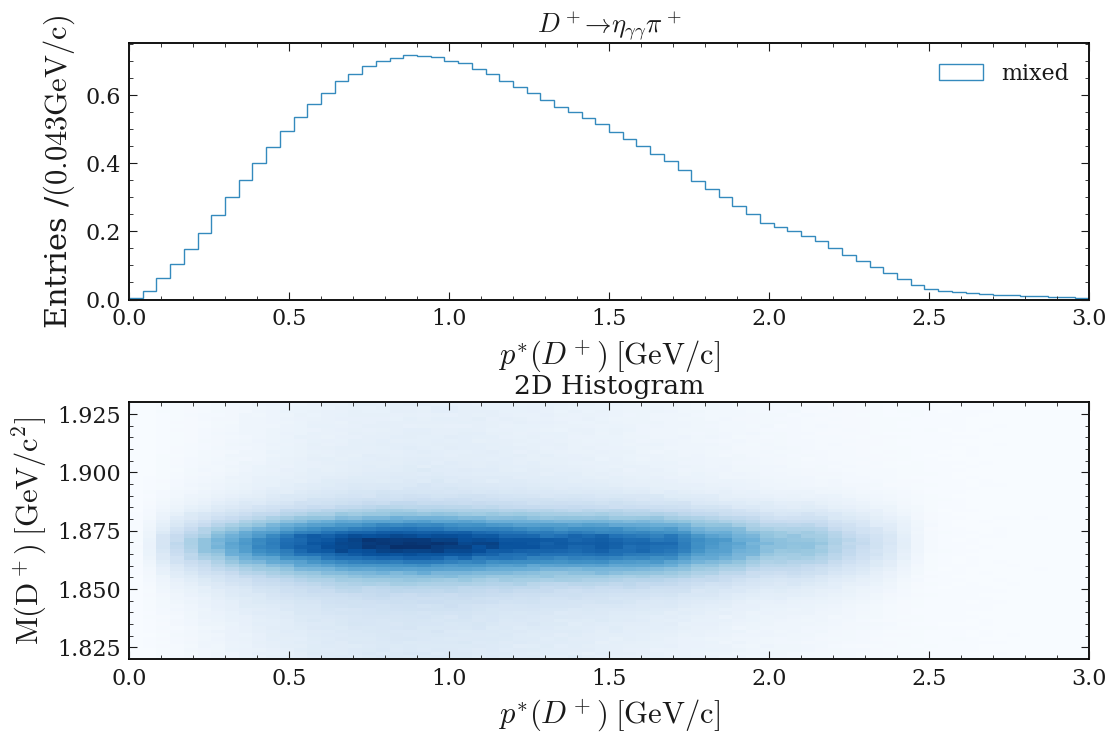

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming the dataframes are already defined
# df = pd_df_test
# df2 = pd_df_test2

var1 = "Dp_CMS_p"
var2 = "Dp_M"

xrange = (0, 3, 71) 
yrange = (1.82, 1.93, 71) 

xm = np.linspace(xrange[0], xrange[1], xrange[2])
ym = np.linspace(yrange[0], yrange[1], yrange[2])

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.4)

df = pd_df_etapip_gg_mixed

# 1D Histogram
ax1 = fig.add_subplot(gs[0])
ax1.hist(pd_df_etapip_gg_mixed[var1], bins=xm, histtype='step', label='mixed', density=True)
# ax1.hist(pd_df_etapip_gg_mixed[var1], bins=xm, histtype='step', label='mixed', density=True)
ax1.legend(loc="upper right")
ax1.set_title(r'$D^+ \to \eta_{\gamma\gamma} \pi^+$')
ax1.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xm[1] - xm[0]
ax1.set_ylabel('Entries' + ' /' + '$(' + ' ' + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c})$')
ax1.set_xlim(xrange[0], xrange[1])

# 2D Histogram
ax2 = fig.add_subplot(gs[1])
h = ax2.hist2d(df[var1], df[var2], bins=[xm, ym], cmap='Blues')
# plt.colorbar(h[3], ax=ax2)
ax2.set_title(r'2D Histogram')
ax2.set_xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
ax2.set_ylabel(r"$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
ax2.set_xlim(xrange[0], xrange[1])
ax2.set_ylim(yrange[0], yrange[1])

# Ensure both subplots have the same horizontal length
for ax in [ax1, ax2]:
    pos = ax.get_position()
    pos.x0 = 0.1  # Left margin
    pos.x1 = 0.9  # Right margin
    ax.set_position(pos)

# plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_mixed_signalmc_v0.png"
plt.savefig(file1_name)
plt.show()

1967045


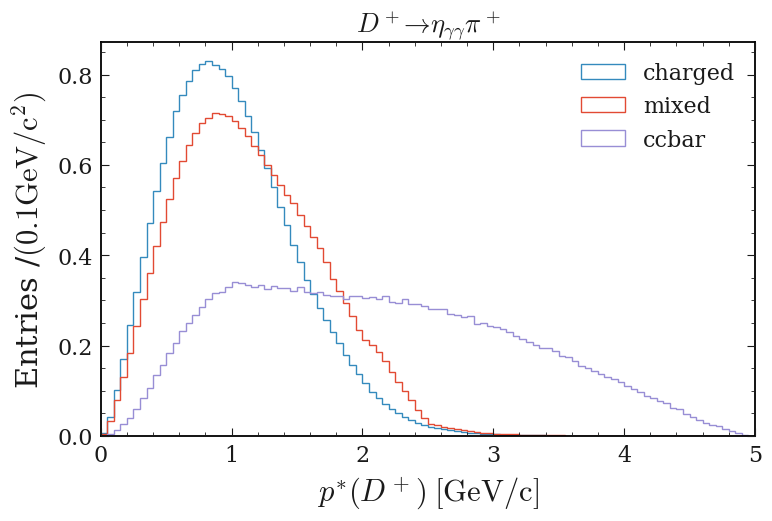

In [39]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,5,101)

xm = np.linspace(*xrange)

df = pd_df_etapip_gg_charged
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

var="Dp_CMS_p"

plt.hist(pd_df_etapip_gg_charged[var],bins=xm,histtype='step',label=r'charged',density=True);
plt.hist(pd_df_etapip_gg_mixed[var],bins=xm,histtype='step',label=r'mixed',density=True);

plt.hist(pd_df_etapip_gg[var],bins=xm,histtype='step',label=r'ccbar',density=True);

plt.legend(loc="upper right")
ax.set_title(r'$D^+ \to \eta_{\gamma\gamma} \pi^+$' )

n, xe = np.histogram(pd_df_etapip_gg_mixed[var], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_charged_mixed_ccbar_signalmc_v0.png"
plt.savefig(file1_name)# plt.savefig(file1_name)
print(len(df))

1967045


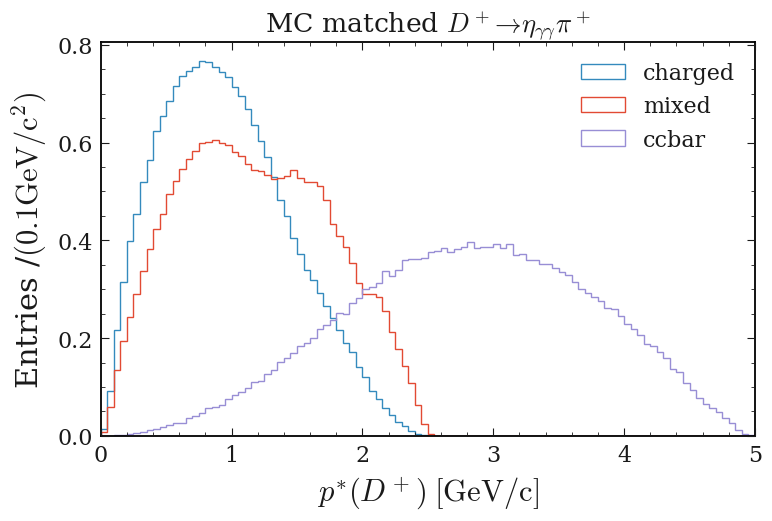

In [40]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,5,101)

xm = np.linspace(*xrange)

df = pd_df_etapip_gg_charged
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

var="Dp_CMS_p"

plt.hist(pd_df_etapip_gg_charged[pd_df_etapip_gg_charged['Dp_isSignal'] == 1][var],bins=xm,histtype='step',label=r'charged',density=True);
plt.hist(pd_df_etapip_gg_mixed[pd_df_etapip_gg_mixed['Dp_isSignal'] == 1][var],bins=xm,histtype='step',label=r'mixed',density=True);
plt.hist(pd_df_etapip_gg[pd_df_etapip_gg['Dp_isSignal']==1][var],bins=xm,histtype='step',label=r'ccbar',density=True);

# plt.hist(pd_df_etapip_gg[var],bins=xm,histtype='step',label=r'ccbar',density=True);

plt.legend(loc="upper right")
ax.set_title(r'MC matched $D^+ \to \eta_{\gamma\gamma} \pi^+$' )

n, xe = np.histogram(pd_df_etapip_gg_mixed[var], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_charged_mixed_ccbar_signalmc_v0_mcmatched.png"
plt.savefig(file1_name)# plt.savefig(file1_name)
print(len(df))

1967045


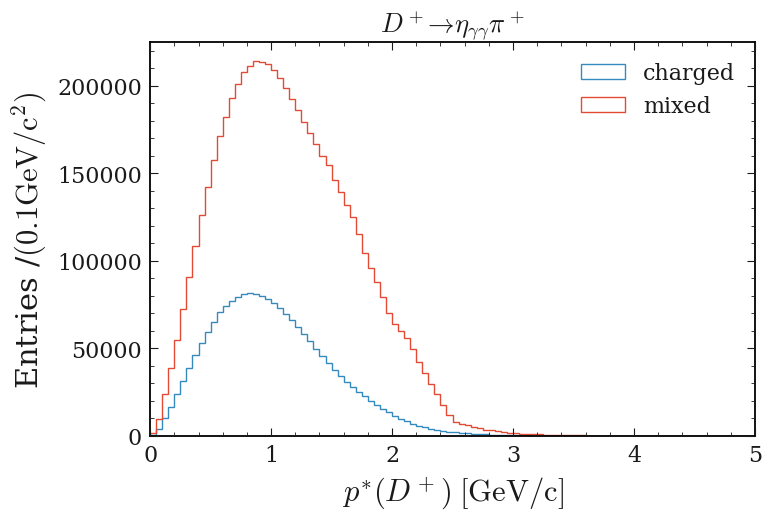

In [41]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,5,101)

xm = np.linspace(*xrange)

df = pd_df_etapip_gg_charged
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

var="Dp_CMS_p"

plt.hist(pd_df_etapip_gg_charged[var],bins=xm,histtype='step',label=r'charged');
plt.hist(pd_df_etapip_gg_mixed[var],bins=xm,histtype='step',label=r'mixed');

# plt.hist(pd_df_etapip_gg[var],bins=xm,histtype='step',label=r'ccbar');

plt.legend(loc="upper right")
ax.set_title(r'$D^+ \to \eta_{\gamma\gamma} \pi^+$' )

n, xe = np.histogram(pd_df_etapip_gg_mixed[var], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_charged_mixed_ccbar_signalmc_v0_not_normalized.png"
plt.savefig(file1_name)# plt.savefig(file1_name)
print(len(df))

1967045


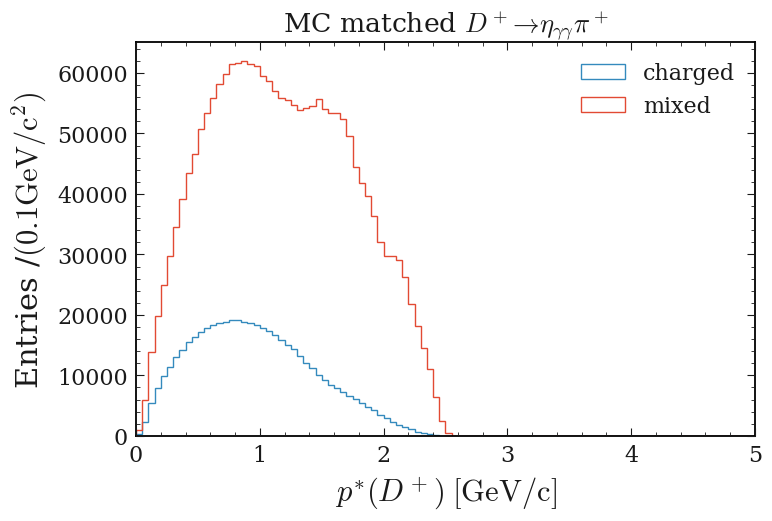

In [42]:
fig = plt.figure()
ax = fig.subplots()
xrange = (0,5,101)

xm = np.linspace(*xrange)

df = pd_df_etapip_gg_charged
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

var="Dp_CMS_p"

plt.hist(pd_df_etapip_gg_charged[pd_df_etapip_gg_charged['Dp_isSignal'] == 1][var],bins=xm,histtype='step',label=r'charged');
plt.hist(pd_df_etapip_gg_mixed[pd_df_etapip_gg_mixed['Dp_isSignal'] == 1][var],bins=xm,histtype='step',label=r'mixed');
# plt.hist(pd_df_etapip_gg[pd_df_etapip_gg['Dp_isSignal']==1][var],bins=xm,histtype='step',label=r'ccbar');

# plt.hist(pd_df_etapip_gg[var],bins=xm,histtype='step',label=r'ccbar',density=True);

plt.legend(loc="upper right")
ax.set_title(r'MC matched $D^+ \to \eta_{\gamma\gamma} \pi^+$' )

n, xe = np.histogram(pd_df_etapip_gg_mixed[var], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_charged_mixed_ccbar_signalmc_v0_mcmatched_not_normalized.png"
plt.savefig(file1_name)# plt.savefig(file1_name)
print(len(df))

In [61]:
# Assuming pd_df_etapip_gg_mixed is your DataFrame
filtered_df = pd_df_etapip_gg_mixed[pd_df_etapip_gg_mixed['Dp_isSignal'] == 1]

# Count the occurrences of each number in the 'Dp_genMotherPDG' column
value_counts = filtered_df['Dp_genMotherPDG'].value_counts()

print(value_counts)

-511.0      705084
 511.0      701700
 413.0      293313
-413.0      291774
 10413.0     11803
-10413.0     11708
-415.0        8462
 415.0        8345
 10411.0      6425
-10411.0      6324
 30443.0      6150
Name: Dp_genMotherPDG, dtype: int64


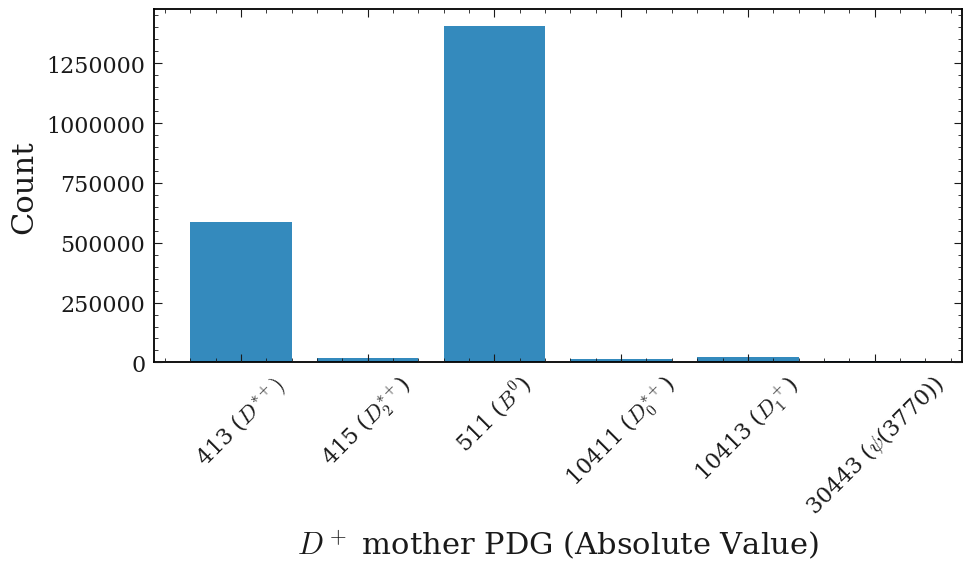

In [73]:
data = {
    'Dp_genMotherPDG': [-511.0, 511.0, 413.0, -413.0, 10413.0, -10413.0, -415.0, 415.0, 10411.0, -10411.0, 30443.0],
    'Count': [705084, 701700, 293313, 291774, 11803, 11708, 8462, 8345, 6425, 6324, 6150]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove sign and aggregate counts
df['Abs_Dp_genMotherPDG'] = df['Dp_genMotherPDG'].abs()

# Map the values to their labels
label_map = {
    413.0: r'413 ($D^{*+}{$)',
    415.0: r'415 ($D_2^{*+}$)',
    511.0: r'511 ($B^0$)',
    10411.0: r'10411 ($D_0^{*+}$)',
    10413.0: r'10413 ($D_1^+$)',
    30443.0: r'30443 ($\psi$(3770))'
}

# Apply the map to the 'Abs_Dp_genMotherPDG' column
df['Label'] = df['Abs_Dp_genMotherPDG'].map(label_map).fillna(df['Abs_Dp_genMotherPDG'].astype(int).astype(str))

# Aggregate counts
aggregated_counts = df.groupby('Label')['Count'].sum().reset_index()

# Sort by the numeric value of the label (for plotting purposes)
aggregated_counts['Numeric'] = aggregated_counts['Label'].apply(lambda x: float(x.split()[0]))
aggregated_counts = aggregated_counts.sort_values('Numeric')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(aggregated_counts['Label'], aggregated_counts['Count'])
plt.xlabel('$D^+$ mother PDG (Absolute Value)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
file1_name = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_from_B/MC15ri_charged_mixed_ccbar_signalmc_v0_mcmatched_mixedonly_DpgenMotherPDG.png"
plt.savefig(file1_name)# plt.savefig(file1_name)
plt.show()


/tmp/ipykernel_14539/4118441036.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Abs_Dp_genMotherPDG'] = filtered_df['Dp_genMotherPDG'].abs()
/tmp/ipykernel_14539/4118441036.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Label'] = filtered_df['Abs_Dp_genMotherPDG'].map(label_map)


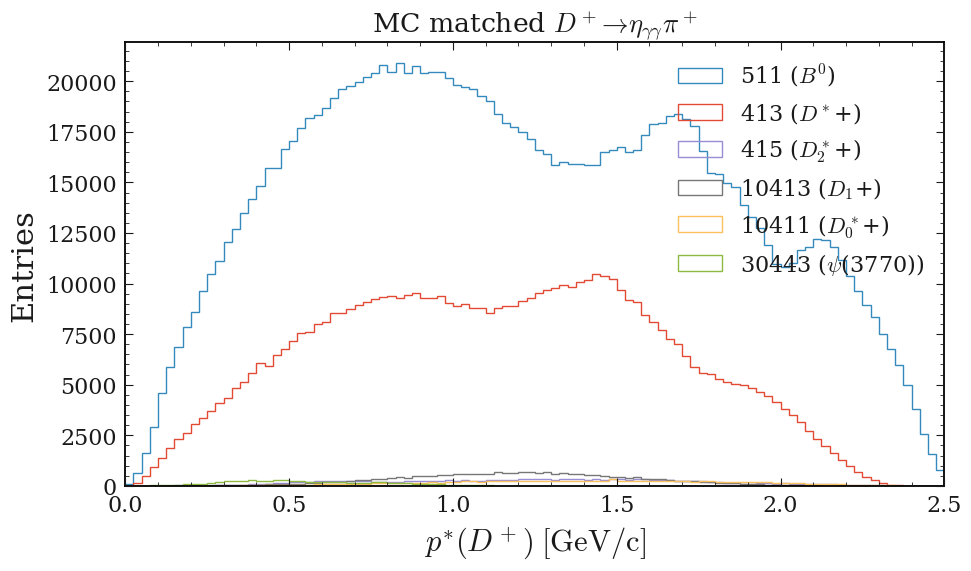

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Mapping specific values to labels
label_map = {
    413.0: r'413 ($D^*$+)',
    415.0: r'415 ($D_2^*$+)',
    511.0: r'511 ($B^0$)',
    10411.0: r'10411 ($D_0^*$+)',
    10413.0: r'10413 ($D_1$+)',
    30443.0: r'30443 ($\psi$(3770))'
}

# Add an absolute value column
filtered_df['Abs_Dp_genMotherPDG'] = filtered_df['Dp_genMotherPDG'].abs()

# Apply the label map to create a labeled column
filtered_df['Label'] = filtered_df['Abs_Dp_genMotherPDG'].map(label_map)

# Define bins for the histogram
xrange = (0, 2.5, 101)
xm = np.linspace(*xrange)

# Plot histograms
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over unique labels and plot histogram for each
for label in filtered_df['Label'].unique():
    subset = filtered_df[filtered_df['Label'] == label]
    ax.hist(subset['Dp_CMS_p'], bins=xm, histtype='step', label=label)

# Set labels and title
plt.xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
plt.ylabel('Entries')
plt.title(r'MC matched $D^+ \to \eta_{\gamma\gamma} \pi^+$')
plt.legend(loc="upper right")
plt.xlim(xrange[0], xrange[1])
plt.tight_layout()

plt.show()


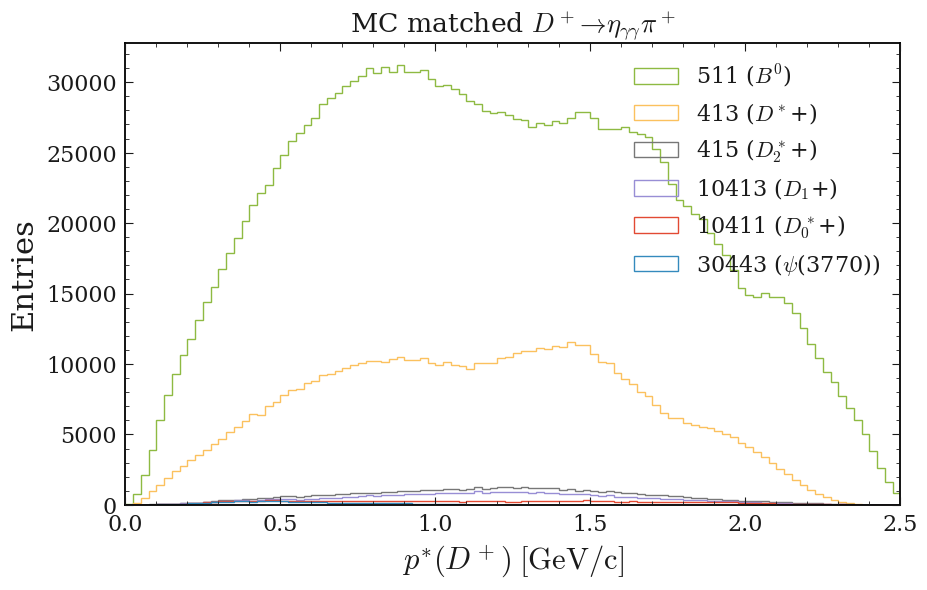

In [71]:
# Prepare data for stacked histogram
data_list = []
labels = []

for label in filtered_df['Label'].unique():
    subset = filtered_df[filtered_df['Label'] == label]
    data_list.append(subset['Dp_CMS_p'])
    labels.append(label)

data_list.reverse()
labels.reverse()

# Define bins for the histogram
xrange = (0, 2.5, 101)
xm = np.linspace(*xrange)

# Plot stacked histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=xm, stacked=True, label=labels,histtype='step')

# Set labels and title
plt.xlabel(r"$p^{*}(D^+) \; [\mathrm{GeV/c}]$")
plt.ylabel('Entries')
plt.title(r'MC matched $D^+ \to \eta_{\gamma\gamma} \pi^+$')
plt.legend(loc="upper right")
plt.xlim(xrange[0], xrange[1])
# plt.tight_layout()

plt.show()

1971088


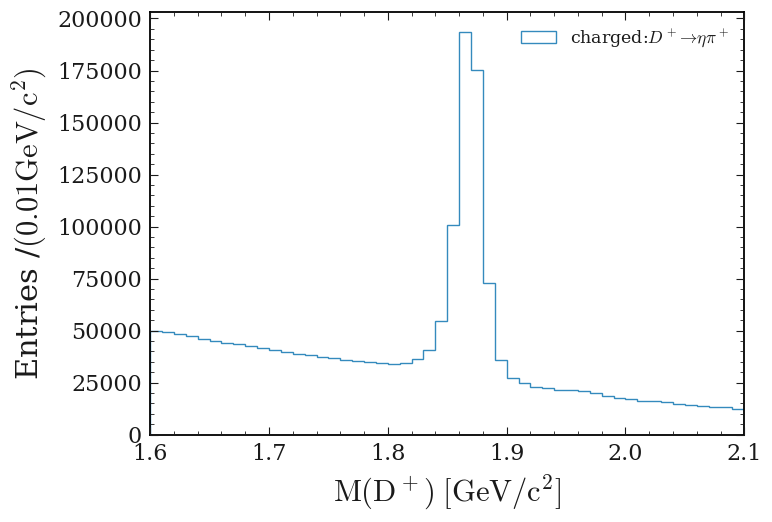

In [5]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.6,2.1,51)

xm = np.linspace(*xrange)

df = pd_df_test
# df2 = pd_df_test2

N_df = len(df)
# N_df2 = len(df2)

plt.hist(df["Dp_M"],bins=xm,histtype='step',label=r'charged:$D^+ \to \eta \pi^+$');
# plt.hist(df2["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^- \pi^+ \gamma_F$ MC matched(' + str(N_df2) +')');

plt.legend(loc="upper right",fontsize=12.5)
# ax.set_title(r'MC15ri 1/ab' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/antiKstargamma/MC15ri_D0_M_FSR.png"
# plt.savefig(file1_name)
print(len(df))